**Week 1-2: Project Planning & Data Preparation**

In [ ]:
!pip install datasets

In [ ]:
# --- Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datasets import load_dataset

# --- Load IMDb dataset ---
dataset = load_dataset("imdb")
df = pd.concat([pd.DataFrame(dataset['train']), pd.DataFrame(dataset['test'])], ignore_index=True)

In [ ]:
# --- Basic cleaning ---
def clean_text(text):
    text = re.sub(r"<.*?>", "", text)
    text = text.strip()
    return text

df = df.dropna(subset=["text", "label"])
df["text"] = df["text"].apply(clean_text)
df["label"] = df["label"].astype(int)

# --- Calculate review length ---
df["review_word_count"] = df["text"].apply(lambda x: len(x.split()))
df["review_char_count"] = df["text"].apply(len)

# --- Save cleaned dataset ---
df.to_csv("cleaned_imdb.csv", index=False)

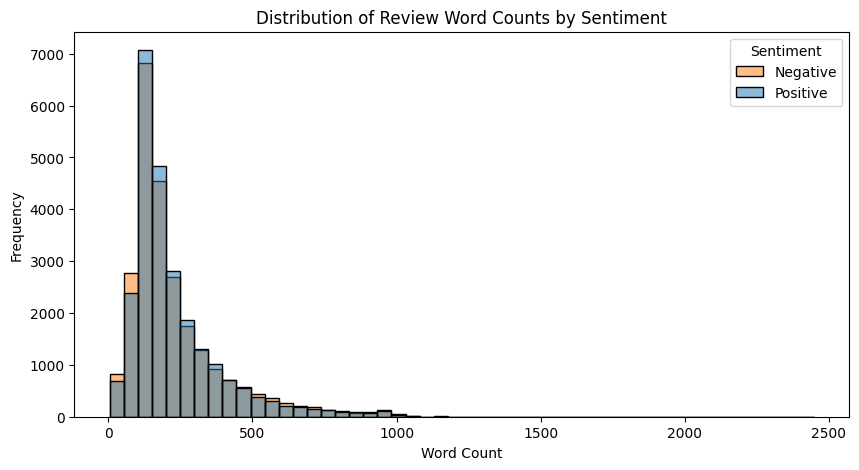

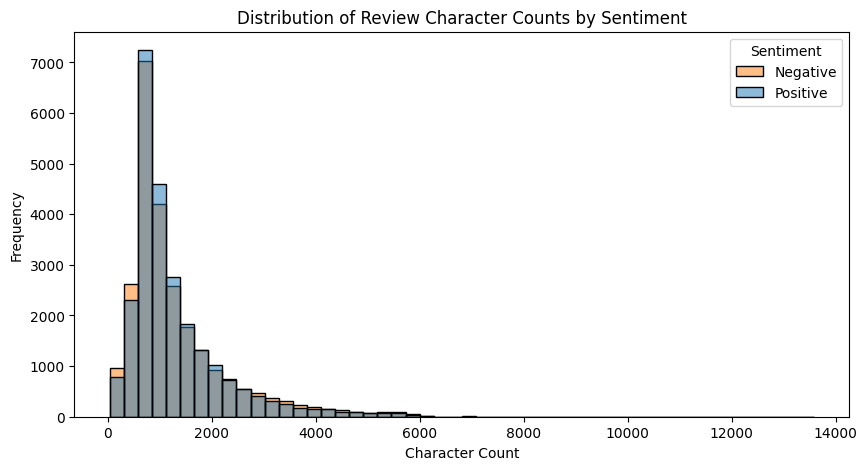

In [ ]:
# --- Plot distribution: Word count ---
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="review_word_count", hue="label", bins=50)
plt.title("Distribution of Review Word Counts by Sentiment")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend(title="Sentiment", labels=["Negative", "Positive"])
plt.show()

# --- Plot distribution: Character count ---
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="review_char_count", hue="label", bins=50)
plt.title("Distribution of Review Character Counts by Sentiment")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.legend(title="Sentiment", labels=["Negative", "Positive"])
plt.show()

In [ ]:
# --- Calculate word count and character count distribution for positive and negative reviews ---

# Separate positive and negative reviews
positive_reviews = df[df['label'] == 1]
negative_reviews = df[df['label'] == 0]

# Calculate word and character count statistics for positive and negative reviews
positive_word_count = positive_reviews['review_word_count']
negative_word_count = negative_reviews['review_word_count']
positive_char_count = positive_reviews['review_char_count']
negative_char_count = negative_reviews['review_char_count']

# Print basic statistical data
print("Positive Reviews - Word Count Statistics")
print(positive_word_count.describe())
print("\nNegative Reviews - Word Count Statistics")
print(negative_word_count.describe())

print("\nPositive Reviews - Character Count Statistics")
print(positive_char_count.describe())
print("\nNegative Reviews - Character Count Statistics")
print(negative_char_count.describe())

Positive Reviews - Word Count Statistics
count    25000.000000
mean       228.926080
std        174.455784
min         10.000000
25%        123.000000
50%        170.000000
75%        278.000000
max       2450.000000
Name: review_word_count, dtype: float64

Negative Reviews - Word Count Statistics
count    25000.00000
mean       225.29808
std        161.84282
min          4.00000
25%        126.00000
50%        171.00000
75%        273.00000
max       1474.00000
Name: review_word_count, dtype: float64

Positive Reviews - Character Count Statistics
count    25000.000000
mean      1301.268600
std       1013.086991
min         65.000000
25%        682.000000
50%        951.000000
75%       1582.250000
max      13584.000000
Name: review_char_count, dtype: float64

Negative Reviews - Character Count Statistics
count    25000.000000
mean      1269.073400
std        927.029378
min         32.000000
25%        695.000000
50%        956.000000
75%       1536.000000
max       8681.000000
Name: r

**Week 3-4: Data Analysis & Visualization**

In [ ]:
# --- Statistical Method: t-test to Analyze the Length Difference Between Positive and Negative Reviews ---

from scipy import stats

# --- Split into Positive and Negative Reviews ---
positive_reviews = df[df['label'] == 1]
negative_reviews = df[df['label'] == 0]

# --- Perform t-test: Compare word count between positive and negative reviews ---
t_stat_word_count, p_value_word_count = stats.ttest_ind(positive_reviews['review_word_count'], negative_reviews['review_word_count'])
t_stat_char_count, p_value_char_count = stats.ttest_ind(positive_reviews['review_char_count'], negative_reviews['review_char_count'])

print("t-test Results:")
print(f"Word Count: t-statistic = {t_stat_word_count}, p-value = {p_value_word_count}")
print(f"Character Count: t-statistic = {t_stat_char_count}, p-value = {p_value_char_count}")

# Check if there is a significant difference
if p_value_word_count < 0.05:
    print("There is a significant difference in word count between positive and negative reviews.")
else:
    print("There is no significant difference in word count between positive and negative reviews.")

if p_value_char_count < 0.05:
    print("There is a significant difference in character count between positive and negative reviews.")
else:
    print("There is no significant difference in character count between positive and negative reviews.")

t-test Results:
Word Count: t-statistic = 2.410582403876869, p-value = 0.0159306575993368
Character Count: t-statistic = 3.706990933942738, p-value = 0.0002099627383007627
There is a significant difference in word count between positive and negative reviews.
There is a significant difference in character count between positive and negative reviews.


<ipython-input-16-41ba1cea1c34>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='review_word_count', data=df, palette={'0': 'red', '1': 'green'})


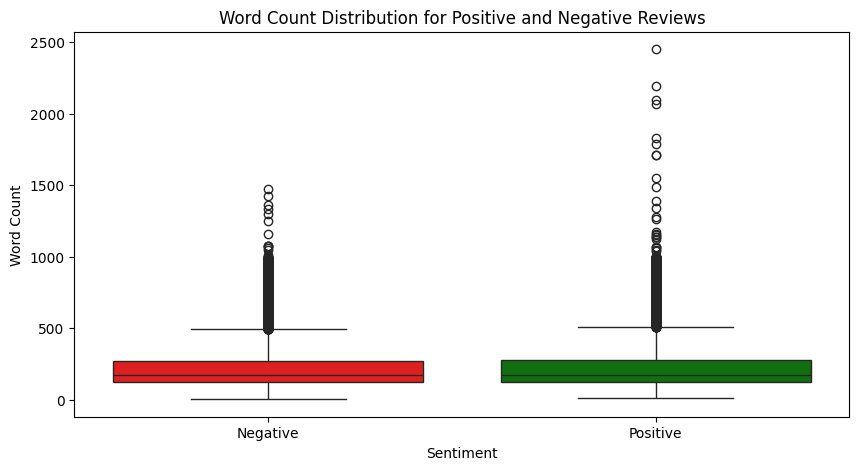

<ipython-input-16-41ba1cea1c34>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='review_char_count', data=df, palette={'0': 'red', '1': 'green'})


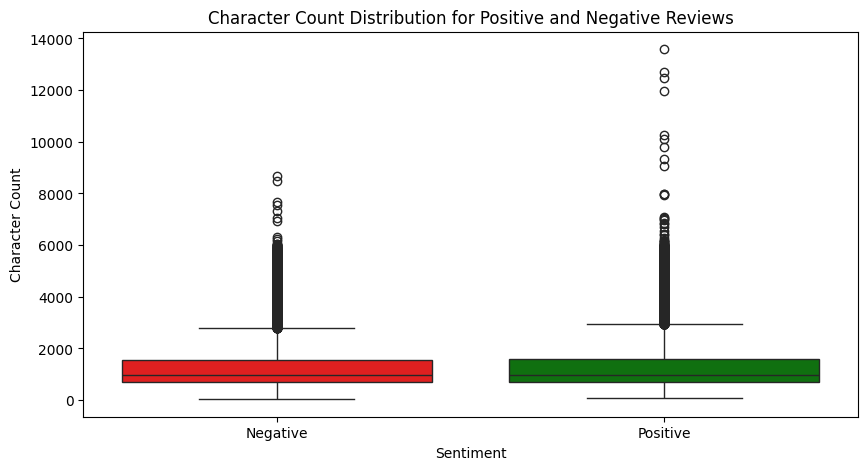

In [ ]:
# --- Visualization: Distribution of Review Lengths by Sentiment ---
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization: Word count distribution using box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='review_word_count', data=df, palette={'0': 'red', '1': 'green'})
plt.title("Word Count Distribution for Positive and Negative Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Visualization: Character count distribution using box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='review_char_count', data=df, palette={'0': 'red', '1': 'green'})
plt.title("Character Count Distribution for Positive and Negative Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Character Count")
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()